In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import scale
import tensorflow.keras as keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras import regularizers
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [2]:
df = pd.read_csv('ph-data.csv')

In [3]:
df.isnull().sum()

blue     0
green    0
red      0
label    0
dtype: int64

In [7]:
df

,blue,green,red,label
0,36,27,231,0
1,36,84,250,1
2,37,164,255,2
3,22,205,255,3
4,38,223,221,4
...,...,...,...,...
648,201,123,0,10
649,203,51,46,11
650,169,62,48,12
651,173,37,79,13


In [4]:
df.shape

(653, 4)

In [5]:
x_train = df.drop(['label'], axis = 1)
y_train = to_categorical(df['label'])

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train)

In [76]:
model = Sequential([
    Dense(16, input_shape = (3,), bias_initializer = "zeros", kernel_initializer='he_normal'),
    Activation('relu'),
    Dense(32, kernel_regularizer = regularizers.l2(0.001)),
    Dropout(0.5), 
    Activation('relu'),
    Dense(64, kernel_regularizer = regularizers.l2(0.001)),
    Dropout(0.4),
    Activation('relu'),
    Dense(128, kernel_regularizer = regularizers.l2(0.001)),
    Dropout(0.3),
    Activation('relu'),
    Dense(256, kernel_regularizer = regularizers.l2(0.001)),
    Dropout(0.2),
    Activation('relu'),
    Dense(15, kernel_regularizer = regularizers.l2(0.01)),
    Activation('softmax'),
])

In [77]:
model.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [78]:
callbacks = []
callbacks.append(EarlyStopping('val_accuracy', patience=50, restore_best_weights=True))
callbacks.append(ModelCheckpoint("best-weights.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, period=10))

In [79]:
h = model.fit(x_train, y_train, epochs = 500, batch_size = 16, validation_data = (x_test, y_test), callbacks = callbacks)

Train on 489 samples, validate on 164 samples
Epoch 1/500
489/489 [==============================] - 0s 1ms/step - loss: 24.0471 - accuracy: 0.0777 - val_loss: 3.7804 - val_accuracy: 0.2927
Epoch 2/500
489/489 [==============================] - 0s 188us/step - loss: 11.8099 - accuracy: 0.1166 - val_loss: 2.8257 - val_accuracy: 0.2317
Epoch 3/500
489/489 [==============================] - 0s 164us/step - loss: 8.1605 - accuracy: 0.1268 - val_loss: 2.4792 - val_accuracy: 0.2805
Epoch 4/500
489/489 [==============================] - 0s 147us/step - loss: 6.5804 - accuracy: 0.1329 - val_loss: 2.4213 - val_accuracy: 0.2866
Epoch 5/500
489/489 [==============================] - 0s 164us/step - loss: 5.1219 - accuracy: 0.1493 - val_loss: 2.5008 - val_accuracy: 0.3049
Epoch 6/500
489/489 [==============================] - 0s 171us/step - loss: 4.5869 - accuracy: 0.1268 - val_loss: 2.5292 - val_accuracy: 0.2500
Epoch 7/500
489/489 [==============================] - 0s 201us/step - loss: 4.0654 

Epoch 54/500
489/489 [==============================] - 0s 153us/step - loss: 2.1118 - accuracy: 0.3701 - val_loss: 1.8351 - val_accuracy: 0.6463
Epoch 55/500
489/489 [==============================] - 0s 122us/step - loss: 1.9855 - accuracy: 0.4110 - val_loss: 1.7942 - val_accuracy: 0.6037
Epoch 56/500
489/489 [==============================] - 0s 134us/step - loss: 2.1112 - accuracy: 0.3108 - val_loss: 1.8201 - val_accuracy: 0.5732
Epoch 57/500
489/489 [==============================] - 0s 150us/step - loss: 2.0587 - accuracy: 0.3620 - val_loss: 1.8033 - val_accuracy: 0.6159
Epoch 58/500
489/489 [==============================] - 0s 222us/step - loss: 2.0550 - accuracy: 0.3456 - val_loss: 1.7986 - val_accuracy: 0.5549
Epoch 59/500
489/489 [==============================] - 0s 120us/step - loss: 1.9410 - accuracy: 0.3824 - val_loss: 1.7458 - val_accuracy: 0.6341
Epoch 60/500
489/489 [==============================] - 0s 129us/step - loss: 2.0931 - accuracy: 0.3354 - val_loss: 1.7634 -

Epoch 108/500
489/489 [==============================] - 0s 133us/step - loss: 1.7366 - accuracy: 0.4417 - val_loss: 1.5213 - val_accuracy: 0.6341
Epoch 109/500
489/489 [==============================] - 0s 130us/step - loss: 1.7715 - accuracy: 0.4458 - val_loss: 1.5461 - val_accuracy: 0.6037
Epoch 110/500
489/489 [==============================] - 0s 133us/step - loss: 1.6988 - accuracy: 0.4356 - val_loss: 1.5245 - val_accuracy: 0.6463

Epoch 00110: val_accuracy improved from 0.62195 to 0.64634, saving model to best-weights.hdf5
Epoch 111/500
489/489 [==============================] - 0s 122us/step - loss: 1.7072 - accuracy: 0.4724 - val_loss: 1.5125 - val_accuracy: 0.6341
Epoch 112/500
489/489 [==============================] - 0s 132us/step - loss: 1.7405 - accuracy: 0.4479 - val_loss: 1.5183 - val_accuracy: 0.6402
Epoch 113/500
489/489 [==============================] - 0s 124us/step - loss: 1.7035 - accuracy: 0.4663 - val_loss: 1.5036 - val_accuracy: 0.6707
Epoch 114/500
489/489 [

In [80]:
print (h.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


In [81]:
accuracy = model.evaluate(x_test, y_test)
print(f"Validation Accuracy UNTRAINED: {h.history['val_accuracy'][-1]:.02f}")
print(f"Final Loss on Testing Data UNTRAINED: {accuracy[0]:02f}")
print(f"Final Untrained Test ACCURACY: {accuracy[1]:02f}")

164/164 [==============================] - 0s 54us/step
Validation Accuracy UNTRAINED: 0.70
Final Loss on Testing Data UNTRAINED: 1.513845
Final Untrained Test ACCURACY: 0.713415


In [82]:
model.load_weights("best-weights.hdf5")
accuracy = model.evaluate(x_test, y_test)
print(f"Validation Accuracy UNTRAINED: {h.history['val_accuracy'][-1]:.02f}")
print(f"Final Loss on Testing Data TRAINED: {accuracy[0]:02f}")
print(f"Final Trained Test ACCURACY: {accuracy[1]:02f}")

164/164 [==============================] - 0s 63us/step
Validation Accuracy UNTRAINED: 0.70
Final Loss on Testing Data TRAINED: 1.480617
Final Trained Test ACCURACY: 0.676829


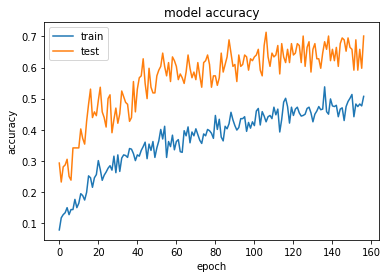

In [83]:
##ACCURACY GRAPH
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

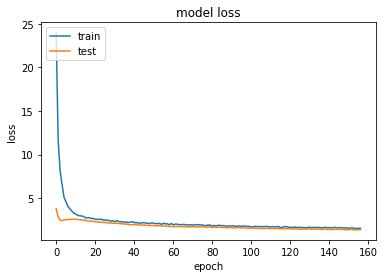

In [84]:
##LOSS GRAPH
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()